
# 🧾 Assignment: Detecting Spending Anomalies using Confidence Intervals

**Context:**  
Customer **Karim's** debit card transactions over one year are provided. Each transaction has a date, category, amount, and description.  

**Goal:**  
Use **Confidence Intervals** to detect anomalies in spending Overall and per category. Build a Model that, given an amount, returns whether the transaction is **normal** or **anomalous** against Overall Spending and Category Spending.

---



## 📂 Dataset
The dataset file `karim_transactions_year.csv` contains:
- `Date` – Transaction date  
- `Category` – Expense category  
- `Amount` – Transaction amount (PKR)  
- `Description` – Transaction note  

---
## ✅ Tasks
1. Load the dataset and explore its structure.  
2. Create Overall Anomay Detection Model
3. Challenge your self with Category Wise Anomaly Model


In [17]:

import pandas as pd
import numpy as np

df = pd.read_csv('karim_transactions_year.csv')

df.head()


,Date,Category,Amount,Description
0,2024-09-02,Transport,532.21,Careem ride
1,2024-09-03,Dining,1486.17,Lunch at Kolachi
2,2024-09-04,Dining,470.52,Lunch at Kolachi
3,2024-09-05,Utilities,5449.69,PTCL internet bill
4,2024-09-07,Entertainment,2016.03,Movie tickets


In [18]:
print("Number of transactions:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of transactions: 276
Number of columns: 4


In [19]:
print(df.describe)

<bound method NDFrame.describe of            Date       Category   Amount             Description
0    2024-09-02      Transport   532.21             Careem ride
1    2024-09-03         Dining  1486.17        Lunch at Kolachi
2    2024-09-04         Dining   470.52        Lunch at Kolachi
3    2024-09-05      Utilities  5449.69      PTCL internet bill
4    2024-09-07  Entertainment  2016.03           Movie tickets
..          ...            ...      ...                     ...
271  2025-08-27         Dining  1551.61  Coffee at Gloria Jeans
272  2025-08-29         Dining   789.35        Lunch at Kolachi
273  2025-08-30      Utilities  5021.32      PTCL internet bill
274  2025-08-30       Shopping  2234.85      Daraz online order
275  2025-09-01      Utilities  5172.38           SSGC gas bill

[276 rows x 4 columns]>


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         276 non-null    object 
 1   Category     276 non-null    object 
 2   Amount       276 non-null    float64
 3   Description  276 non-null    object 
dtypes: float64(1), object(3)
memory usage: 8.8+ KB


In [21]:
def calculate_ci(mean, std, count, z):
    """Calculates the 95% confidence interval."""
    if count < 2 or std is np.nan:
        return np.nan, np.nan # Return NaN for insufficient data
    ci_lower = mean - z * std / np.sqrt(count)
    ci_upper = mean + z * std / np.sqrt(count)
    return ci_lower, ci_upper

In [22]:

amounts = df['Amount'].to_numpy()

# Compute statistics
overall_mean = np.mean(amounts)
overall_std = np.std(amounts, ddof=1)  # sample std deviation
overall_count = len(amounts)

print(f"Overall Mean: {overall_mean:.2f} PKR")
print(f"Overall Std Dev: {overall_std:.2f} PKR")
print(f"Total Transactions: {overall_count}")


Overall Mean: 2220.90 PKR
Overall Std Dev: 1239.32 PKR
Total Transactions: 276


In [23]:
categories = df['Category'].unique()
print("Categories:", categories)

Categories: ['Transport' 'Dining' 'Utilities' 'Entertainment' 'Groceries' 'Shopping'
 'Health']


In [24]:
print(df['Category'].value_counts())

Category
Groceries        45
Entertainment    43
Utilities        42
Dining           41
Shopping         37
Transport        36
Health           32
Name: count, dtype: int64


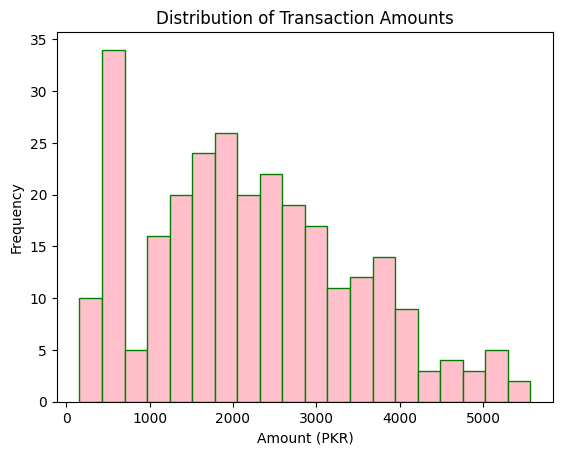

In [25]:
import matplotlib.pyplot as plt

# Histogram of all transaction amounts
plt.hist(df['Amount'], bins=20, color='pink', edgecolor='green')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (PKR)')
plt.ylabel('Frequency')
plt.show()


### 95% of Karim’s transactions should fall within this range if the spending pattern is normal.

### Transactions above ci_upper are unusually high, potential anomalies.


### ✍️ **Build a Anomaly Detection Model on this (Overall)**  

You will need to Build Confidence Interval on Above Overall Transactions and then build a Function that uses those confidence Intervals to see if the provided input value in function is out of the Confidence interval upper bound

**Confidence Interval 95%**

Test Values:

`PKR 1500`

`PKR 3500`


In [26]:
Z = 1.96  # 95% confidence
margin_of_error = overall_std * Z / np.sqrt(overall_count)

ci_lower = overall_mean - margin_of_error
ci_upper = overall_mean + margin_of_error

print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f}) PKR")


95% Confidence Interval: (2074.69, 2367.11) PKR


In [27]:
def check_anomaly(amount, ci_upper, mean_value):
    """
    Check if a transaction is anomalous and return extra info.
    """
    if amount > ci_upper:
        excess = amount - mean_value
        return True, f"Anomaly: exceeds mean by {excess:.2f} PKR"
    else:
        return False, "Normal transaction"


In [28]:
test_values = [1500, 3500, 3000]

for amt in test_values:
    flag, message = check_anomaly(amt, ci_upper, overall_mean)
    print(f"Transaction {amt} PKR → {message}")


Transaction 1500 PKR → Normal transaction
Transaction 3500 PKR → Anomaly: exceeds mean by 1279.10 PKR
Transaction 3000 PKR → Anomaly: exceeds mean by 779.10 PKR



### ✍️ **Challenge**  

**Build a Anomaly Detection Model on this (Category Level)**

**Confidence Interval 95%**

Below, calculate the mean, standard deviation **per category**.

(Hint: Smartly Modify Previous Overall Function to get Dataframe as input and First Filter Data by Category and then remainder will act like overall)

Then Build a Function that accepts Amount and Category to give Category Specific Anomaly Status

You can copy code from above **Overall** and try to modify it such that it can work for category specific results and then automate it with a function or logic however you like, then test the input

`PKR 6,000 in Utilities Category`

In [29]:
# Function to calculate CI per category


def calculate_category_ci(category_name, df, Z=1.96):
    """
    Calculate the 95% confidence interval for a specific category
    """
    # Filter the dataframe by category
    category_data = df[df['Category'] == category_name]['Amount'].to_numpy()
    
    if len(category_data) < 2:
        return None, None, len(category_data), "Not enough data"
    
    mean_val = np.mean(category_data)
    std_val = np.std(category_data, ddof=1)
    count_val = len(category_data)
    
    margin = Z * std_val / np.sqrt(count_val)
    ci_lower = mean_val - margin
    ci_upper = mean_val + margin
    
    return ci_lower, ci_upper, mean_val, count_val


In [30]:
def detect_anomaly_category(amount, category_name, df):
    """
    Detect anomalies within a specific category
    """
    ci_lower, ci_upper, mean_val, count_val = calculate_category_ci(category_name, df)
    
    if ci_upper is None:
        return f"Category '{category_name}' has too few transactions for reliable analysis."
    
    if amount > ci_upper:
        excess = amount - mean_val
        return f"Anomaly in {category_name}: exceeds category mean by {excess:.2f} PKR"
    else:
        return f"Normal transaction in {category_name}"


In [31]:
print("\n=== Category-Wise Anomaly Test ===")

test_category_amount = 10000
test_category_name = 'Utilities'

result = detect_anomaly_category(test_category_amount, test_category_name, df)

print(f"Transaction {test_category_amount} PKR in {test_category_name} → {result}")



=== Category-Wise Anomaly Test ===
Transaction 10000 PKR in Utilities → Anomaly in Utilities: exceeds category mean by 5872.95 PKR
